# Demo of Fit Classification Model

In [108]:
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
import keras
from keras.optimizers import Adam
from keras.models import model_from_json, load_model
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
base_layer = 'base.jpg'
relaxed = 'relaxed_tee.jpg'
polo = 'oversized_polo.jpg'
shirt = 'relaxed_fit_shirt.jpg'
slim = 'slim_shirt.jpg'
simon = 'simon.jpg'

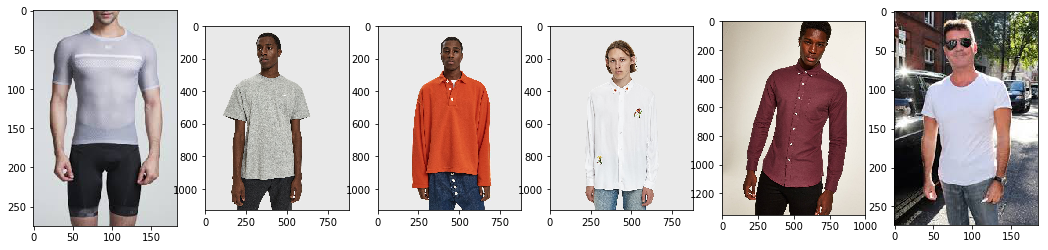

In [112]:
examples = [base_layer, relaxed, polo, shirt, slim, simon]

plt.figure(figsize=(18,8))
for i, example in enumerate(examples):
    plt.subplot(1, 6, i+1)
    ima = np.expand_dims(plt.imread(example),0)
    plt.imshow(ima[0])

plt.show()

In [140]:
labels = ['Oversized','Relaxed Fit', 'Slim Fit', 'Tight Fitting']

In [17]:
vgg16_model = keras.applications.vgg16.VGG16()

In [20]:
lay = 0
model = Sequential()
 
for layer in vgg16_model.layers:
    if lay < 22:
        model.add(layer)
        lay+=1

In [23]:
model.add(Dense(4, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [28]:
model.load_weights('model_weights.h5')

In [29]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.save('fit_classifier.h5')

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [141]:
def predict_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    y = model.predict_classes(x)
    predicted_label = sorted(labels)[int(y)]
    return predicted_label

def display_predict(img_path):
    plt.figure(figsize=(8,8))
    ima = np.expand_dims(plt.imread(img_path),0)
    plt.imshow(ima[0])
    plt.title(predict_img(img_path), fontsize=25)
    plt.show()
    

In [ ]:
base_layer = 'base.jpg'
relaxed = 'relaxed_tee.jpg'
polo = 'oversized_polo.jpg'
shirt = 'relaxed_fit_shirt.jpg'
slim = 'slim_shirt.jpg'
simon = 'simon.jpg'

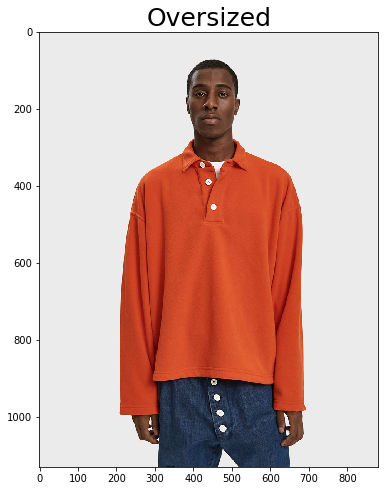

In [144]:
display_predict(polo)

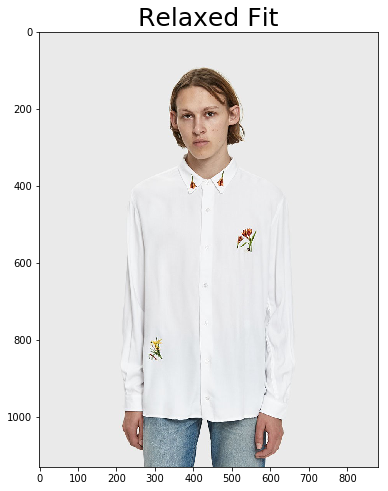

In [145]:
display_predict(shirt)

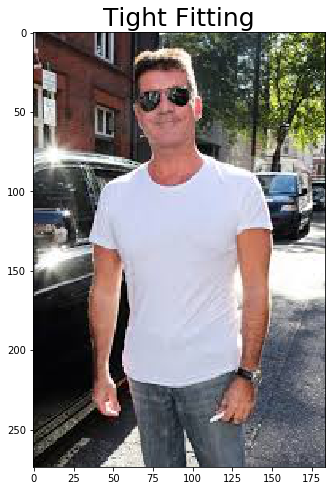

In [143]:
display_predict(simon)

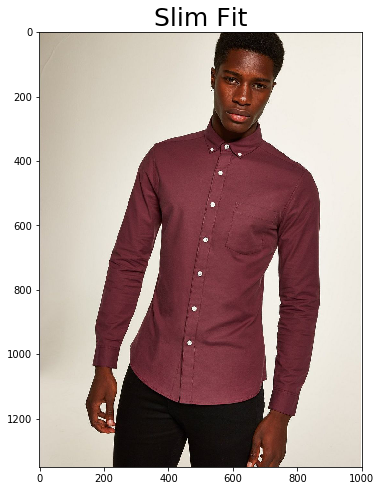

In [146]:
display_predict(slim)